In [195]:
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,Conv2D,MaxPool2D,Flatten,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist,fashion_mnist,cifar10,cifar100
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Mnist

In [196]:
# Handwritten Digit Classification Dataset.

In [197]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain,xtest = xtrain/255,xtest/255
ytrain,ytest = to_categorical(ytrain,10),to_categorical(ytest,10)
xtrain,xtest = np.expand_dims(xtrain,1),np.expand_dims(xtest,1)

In [198]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 1, 28, 28)
(60000, 10)
(10000, 1, 28, 28)
(10000, 10)


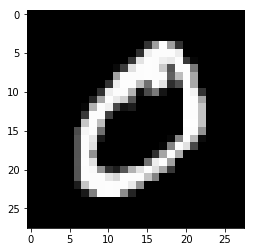

In [199]:
plt.imshow(xtrain[1].reshape(28,28),cmap='gray')

In [200]:
ytrain[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [201]:
xtrain[0].shape

(1, 28, 28)

In [202]:
i = Input(shape=xtrain[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation='softmax')(x)
model = Model(i,x)

In [203]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,validation_split=0.33,batch_size=200,epochs=15)

1257/1257 [==============================] - 106s 84ms/step - loss: 0.2453 - accuracy: 0.9353 - val_loss: 0.1591 - val_accuracy: 0.9569


In [204]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 5s 17ms/step - loss: 0.1449 - accuracy: 0.9609


[0.14486071467399597, 0.9609000086784363]

In [205]:
pred = model.predict(xtest)
pred = np.round(pred)
pred

In [207]:
confusion_matrix(ytest.argmax(axis=1),pred.argmax(axis=1))

array([[ 952,    0,    1,    0,   17,    0,    2,    2,    2,    4],
       [   3, 1124,    2,    1,    1,    0,    2,    1,    1,    0],
       [  10,    1, 1005,    2,    3,    0,    0,    4,    7,    0],
       [   4,    3,    1,  989,    1,    0,    0,    5,    2,    5],
       [   4,    2,    0,    0,  963,    0,    2,    2,    0,    9],
       [  12,    4,    0,   67,    3,  794,    2,    2,    1,    7],
       [   9,    3,    7,    0,   51,   19,  867,    0,    2,    0],
       [   2,    5,    8,    1,    3,    0,    0, 1004,    1,    4],
       [  17,    1,    3,    8,    4,    0,    0,    5,  928,    8],
       [   3,    4,    0,    7,   14,    1,    0,   11,    1,  968]],
      dtype=int64)

# Fashion Mnist 

In [135]:
# dataset of Zalando's article images

In [158]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
xtrain,xtest = xtrain/255,xtest/255
ytrain,ytest = to_categorical(ytrain,10),to_categorical(ytest,10)
xtrain,xtest = np.expand_dims(xtrain,1),np.expand_dims(xtest,1)

In [159]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 1, 28, 28)
(60000, 10)
(10000, 1, 28, 28)
(10000, 10)


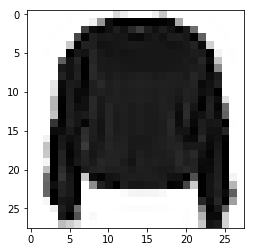

In [165]:
plt.imshow(xtrain[7].reshape(28,28),cmap='Greys')

In [118]:
ytrain[7]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [106]:
i = Input(shape=xtrain[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation='softmax')(x)
model = Model(i,x)

In [107]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=200,epochs=15)

1875/1875 [==============================] - 319s 170ms/step - loss: 0.5040 - accuracy: 0.8330 - val_loss: 0.4060 - val_accuracy: 0.8577


In [119]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 12s 38ms/step - loss: 0.4060 - accuracy: 0.8577


[0.4059607982635498, 0.857699990272522]

In [120]:
pred = model.predict(xtest)
pred = np.round(pred)
pred

In [121]:
confusion_matrix(ytest.argmax(axis=1),pred.argmax(axis=1))

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# CIFAR10

In [136]:
# dataset used for object recognition

In [166]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()
xtrain,xtest = xtrain/255,xtest/255
ytrain,ytest = to_categorical(ytrain,10),to_categorical(ytest,10)

In [167]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


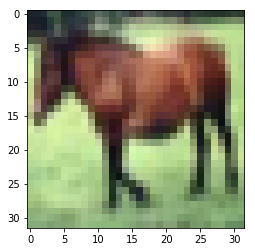

In [173]:
plt.imshow(xtrain[7],cmap='spring')

In [144]:
ytrain[7]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [127]:
i = Input(shape=xtrain[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation='softmax')(x)
model = Model(i,x)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,validation_data=(xtest,ytest)validation_data=(xtest,ytest),batch_size=200,epochs=15)

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
pred = model.predict(xtest)
pred = np.round(pred)
pred

In [ ]:
confusion_matrix(ytest.argmax(axis=1),pred.argmax(axis=1))

# CIFAR100

In [145]:
# dataset used for object recognition with 100 objects

In [174]:
(xtrain,ytrain),(xtest,ytest)=cifar100.load_data()
xtrain,xtest = xtrain/255,xtest/255
ytrain,ytest = to_categorical(ytrain,100),to_categorical(ytest,100)


In [175]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


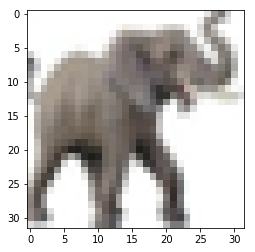

In [176]:
plt.imshow(xtrain[9],cmap='spring')

In [152]:
ytrain[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [177]:
i = Input(shape=xtrain[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation='softmax')(x)
model = Model(i,x)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=200,epochs=15)

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
pred = model.predict(xtest)
pred = np.round(pred)
pred

In [ ]:
confusion_matrix(ytest.argmax(axis=1),pred.argmax(axis=1))